<a href="https://colab.research.google.com/github/bintangnabiil/Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/main/Rangkuman_Chapter_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 7: Ensemble Learning and Random Forests
Ensemble Learning adalah teknik machine learning yang menggabungkan prediksi dari beberapa model (estimator) untuk menghasilkan prediksi yang lebih akurat dan robust dibanding menggunakan model tunggal. Prinsip dasarnya adalah "wisdom of crowds" - keputusan kelompok seringkali lebih baik daripada keputusan individu.

###Keuntungan Ensemble Learning:

- Mengurangi Overfitting: Dengan menggabungkan beberapa model, ensemble dapat mengurangi variance
- Meningkatkan Akurasi: Kombinasi model yang berbeda dapat menangkap pola yang berbeda dalam data
- Robustness: Lebih tahan terhadap noise dan outlier
- Generalisasi yang Lebih Baik: Performa lebih stabil pada data yang belum pernah dilihat

##1. Voting Classifiers
Voting classifier menggabungkan prediksi dari beberapa classifier yang berbeda dengan cara voting.

###Hard Voting
Setiap classifier memberikan satu vote untuk kelas yang diprediksi, dan kelas dengan vote terbanyak yang dipilih.

###Soft Voting
Menggunakan probabilitas prediksi dari setiap classifier, kemudian rata-rata probabilitas tersebut untuk menentukan kelas final.

##2. Bagging dan Pasting
Bagging (Bootstrap Aggregating) dan Pasting adalah teknik ensemble yang melatih beberapa model dengan subset data yang berbeda.

###Perbedaan Bagging vs Pasting:

- Bagging: Sampling dengan replacement (bootstrap sampling)
- Pasting: Sampling tanpa replacement

###Bootstrap Sampling
Teknik sampling yang memungkinkan pengambilan sampel yang sama lebih dari sekali. Hal ini menciptakan variasi dalam training set yang dapat mengurangi overfitting.

##3. Out-of-Bag (OOB) Evaluation
Dalam bagging, setiap estimator dilatih dengan subset bootstrap. Rata-rata, setiap bootstrap set hanya mengandung sekitar 63% dari instance training asli. Instance yang tidak dipilih (37%) disebut out-of-bag (OOB) instances.

OOB evaluation memungkinkan evaluasi ensemble tanpa perlu validation set terpisah, karena setiap estimator dapat dievaluasi menggunakan OOB instances-nya.

##4. Random Patches dan Random Subspaces
Bagging juga dapat dilakukan pada level fitur:

- Random Patches: Sampling baik pada instance maupun fitur
- Random Subspaces: Sampling hanya pada fitur (menggunakan semua instance)

##5. Random Forests
Random Forest adalah extension dari bagging yang menggunakan Decision Trees sebagai base estimator dengan tambahan randomness pada level splitting nodes.

###Karakteristik Random Forest:

- Menggunakan bootstrap sampling untuk training data
- Pada setiap split, hanya mempertimbangkan subset random dari fitur
- Menggabungkan prediksi melalui majority voting (classification) atau averaging (regression)

###Extra Randomness
Random Forest menambahkan randomness dengan memilih threshold splitting secara random untuk setiap fitur yang dipertimbangkan, bukan mencari threshold terbaik.

##6. Feature Importance
Random Forest dapat memberikan ukuran importance setiap fitur berdasarkan seberapa banyak fitur tersebut mengurangi impurity di semua trees.

##7. Boosting
Boosting adalah ensemble method yang melatih model secara sequential, di mana setiap model berusaha memperbaiki kesalahan model sebelumnya.

###AdaBoost (Adaptive Boosting)
AdaBoost bekerja dengan:

- Melatih weak learner pada dataset
- Meningkatkan weight dari instance yang salah diprediksi
- Melatih weak learner berikutnya dengan weight yang sudah diupdate
- Mengulangi proses hingga jumlah estimator tercapai

###Gradient Boosting
Gradient Boosting melatih model baru untuk memprediksi residual (error) dari ensemble sebelumnya.

##8. Stacking (Stacked Generalization)
Stacking menggunakan meta-learner (blender) untuk mempelajari cara terbaik menggabungkan prediksi dari beberapa base learner.

#Implementasi Kode
##1. Voting Classifiers

In [1]:
# Contoh implementasi Voting Classifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                          n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create individual classifiers
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

# Hard Voting Classifier
voting_clf_hard = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard'
)

# Soft Voting Classifier
voting_clf_soft = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft'
)

# Train and evaluate
for clf in (log_clf, rnd_clf, svm_clf, voting_clf_hard, voting_clf_soft):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{clf.__class__.__name__}: {accuracy_score(y_test, y_pred):.4f}")

LogisticRegression: 0.8200
RandomForestClassifier: 0.8867
SVC: 0.9300
VotingClassifier: 0.8933
VotingClassifier: 0.9200


##2. Bagging dan Pasting

In [2]:
# Implementasi Bagging Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# Bagging dengan Decision Tree
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    random_state=42
)

bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)

# Pasting (bootstrap=False)
pasting_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    bootstrap=False,
    random_state=42
)

pasting_clf.fit(X_train, y_train)
y_pred_pasting = pasting_clf.predict(X_test)

print(f"Bagging accuracy: {accuracy_score(y_test, y_pred_bag):.4f}")
print(f"Pasting accuracy: {accuracy_score(y_test, y_pred_pasting):.4f}")

Bagging accuracy: 0.8567
Pasting accuracy: 0.8500


##3. OOB Evaluation

In [3]:
# OOB Evaluation
bag_clf_oob = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    bootstrap=True,
    oob_score=True,
    random_state=42
)

bag_clf_oob.fit(X_train, y_train)
print(f"OOB Score: {bag_clf_oob.oob_score_:.4f}")

# Bandingkan dengan test set accuracy
y_pred_oob = bag_clf_oob.predict(X_test)
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred_oob):.4f}")

OOB Score: 0.8843
Test Set Accuracy: 0.8767


##4. Random Patches dan Random Subspaces

In [4]:
# Random Patches (sampling instances dan features)
random_patches_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.8,  # 80% of instances
    max_features=0.7,  # 70% of features
    bootstrap=True,
    bootstrap_features=True,
    random_state=42
)

# Random Subspaces (sampling hanya features)
random_subspaces_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=1.0,   # All instances
    max_features=0.7,  # 70% of features
    bootstrap=False,
    bootstrap_features=True,
    random_state=42
)

random_patches_clf.fit(X_train, y_train)
random_subspaces_clf.fit(X_train, y_train)

print(f"Random Patches accuracy: {accuracy_score(y_test, random_patches_clf.predict(X_test)):.4f}")
print(f"Random Subspaces accuracy: {accuracy_score(y_test, random_subspaces_clf.predict(X_test)):.4f}")

Random Patches accuracy: 0.8933
Random Subspaces accuracy: 0.9033


##5. Random Forest

In [5]:
# Random Forest Implementation
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score

# Load iris dataset untuk demonstrasi
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

# Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    max_features='sqrt',  # sqrt(n_features) fitur per split
    bootstrap=True,
    random_state=42
)

# Extremely Random Trees (Extra Trees)
extra_clf = ExtraTreesClassifier(
    n_estimators=100,
    max_depth=10,
    max_features='sqrt',
    bootstrap=False,  # Extra Trees tidak menggunakan bootstrap
    random_state=42
)

# Cross-validation comparison
rf_scores = cross_val_score(rf_clf, X_iris, y_iris, cv=5)
extra_scores = cross_val_score(extra_clf, X_iris, y_iris, cv=5)

print(f"Random Forest CV Score: {rf_scores.mean():.4f} (+/- {rf_scores.std() * 2:.4f})")
print(f"Extra Trees CV Score: {extra_scores.mean():.4f} (+/- {extra_scores.std() * 2:.4f})")

Random Forest CV Score: 0.9667 (+/- 0.0422)
Extra Trees CV Score: 0.9533 (+/- 0.0680)


##6. Feature Importance

Feature Importance:
             feature  importance
2  petal length (cm)    0.436130
3   petal width (cm)    0.436065
0  sepal length (cm)    0.106128
1   sepal width (cm)    0.021678


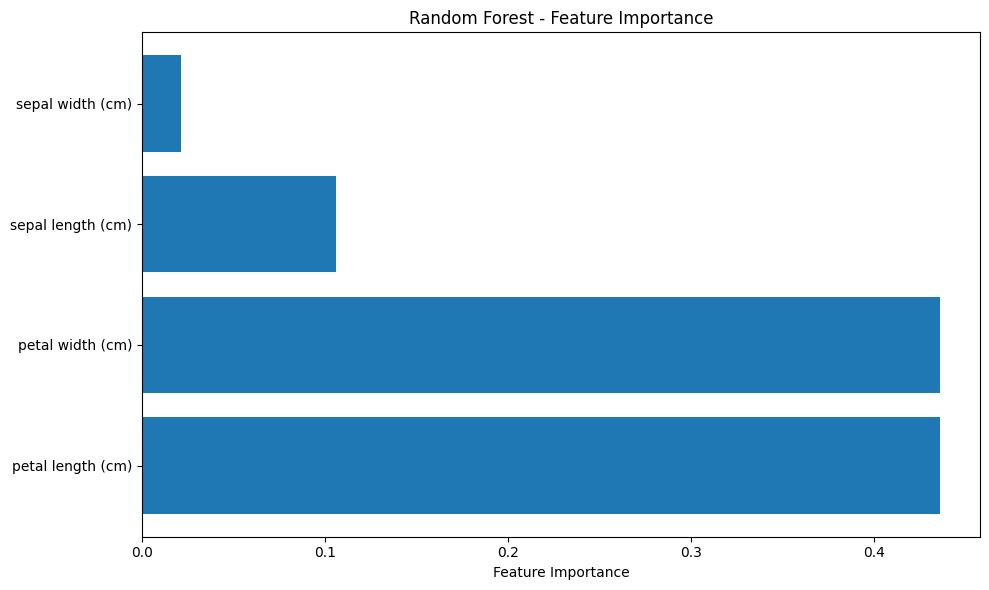

In [6]:
# Feature Importance Analysis
import pandas as pd

# Train Random Forest
rf_clf.fit(X_iris, y_iris)

# Get feature importances
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': rf_clf.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

# Visualize feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance['importance'])
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Feature Importance')
plt.title('Random Forest - Feature Importance')
plt.tight_layout()
plt.show()

##7. AdaBoost

In [7]:
# AdaBoost Implementation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# AdaBoost dengan Decision Tree stumps
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),  # Decision stumps
    n_estimators=200,
    algorithm="SAMME.R",
    learning_rate=0.5,
    random_state=42
)

ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)

print(f"AdaBoost accuracy: {accuracy_score(y_test, y_pred_ada):.4f}")

# Visualize learning curve
from sklearn.model_selection import validation_curve

param_range = [50, 100, 150, 200, 250, 300]
train_scores, val_scores = validation_curve(
    AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), random_state=42),
    X_train, y_train, param_name='n_estimators', param_range=param_range,
    cv=5, scoring='accuracy'
)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_scores.mean(axis=1), 'o-', label='Training Score')
plt.plot(param_range, val_scores.mean(axis=1), 'o-', label='Validation Score')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

InvalidParameterError: The 'algorithm' parameter of AdaBoostClassifier must be a str among {'SAMME'}. Got 'SAMME.R' instead.

##8. Gradient Boosting

Gradient Boosting accuracy: 0.9233


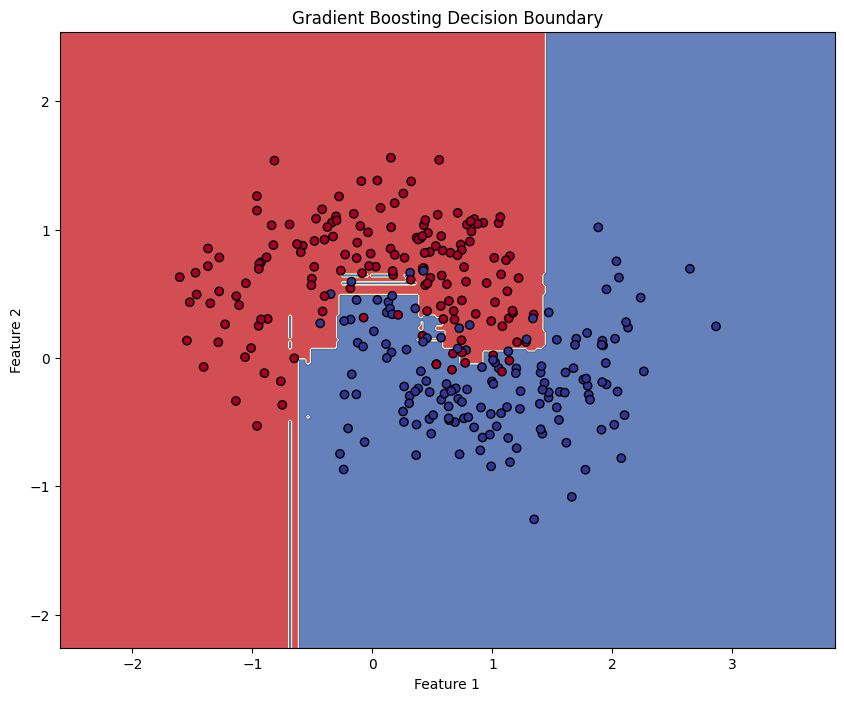

In [8]:
# Gradient Boosting Implementation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_moons

# Generate more complex dataset
X_moons, y_moons = make_moons(n_samples=1000, noise=0.3, random_state=42)
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=42
)

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_clf.fit(X_train_moons, y_train_moons)
y_pred_gb = gb_clf.predict(X_test_moons)

print(f"Gradient Boosting accuracy: {accuracy_score(y_test_moons, y_pred_gb):.4f}")

# Plot decision boundary
def plot_decision_boundary(clf, X, y, title):
    plt.figure(figsize=(10, 8))

    # Create a mesh
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

    # Predict on mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(gb_clf, X_test_moons, y_test_moons,
                      'Gradient Boosting Decision Boundary')

##9. Stacking

In [9]:
# Stacking Implementation
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

# Define meta-learner
meta_learner = LogisticRegression(random_state=42)

# Create stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,  # Use 5-fold CV for training meta-learner
    stack_method='predict_proba'  # Use probabilities instead of predictions
)

stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_test)

print(f"Stacking accuracy: {accuracy_score(y_test, y_pred_stack):.4f}")

# Compare with individual models
for name, clf in base_learners:
    clf.fit(X_train, y_train)
    y_pred_individual = clf.predict(X_test)
    print(f"{name} accuracy: {accuracy_score(y_test, y_pred_individual):.4f}")

Stacking accuracy: 0.9333
rf accuracy: 0.8900
svm accuracy: 0.9300
knn accuracy: 0.9033
